In [1]:
# Import libraries
import pandas as pd
import geopandas as gpd
# Operations on geometries
import shapely
import numpy as np
from numpy import nan
import math
import glob 
import xarray as xr
import xarray
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import tensorflow as tf
import statsmodels.api as sm
import xgboost
import xgboost as xgb
import csv as csv
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn import linear_model
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import TimeSeriesSplit,GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor  #Perforing grid search
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn import datasets, metrics, model_selection
from yellowbrick.regressor import residuals_plot


import scipy
from scipy import stats
import os

import matplotlib.pyplot as plt

from scipy.stats import skew
from collections import OrderedDict

# To make this notebook's output stable across runs
np.random.seed(42)

import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder

from utils_functions.utils_data import *
from utils_functions.utils_ml import *
from utils_functions.utils_RF import *

from utils_functions.utils_plot import *

/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [2]:
# Using observed
#PATH_dis = '/Users/noeliaotero/Documents/OCCR/data/Output_data/csv/Observed_discharge_entsoe_powerplants/'
# Using PREVAH
PATH_dis = '/Users/noeliaotero/Documents/OCCR/data/Output_data/csv/PREVAH_discharge_entsoe_powerplants/mergedata_final/mergedata_with_index/'

In [3]:
# try removing discharge
#PATH_data_out = '/Users/noeliaotero/Documents/OCCR/data/Output_data/csv/outmodels/simulations_PREVAH/Classical_withdoi/'
PATH_data_out = '/Users/noeliaotero/Documents/OCCR/data/Output_data/csv/outmodels_onlydischarge_doi/simulations_PREVAH/Classical_withdoi/'
os.makedirs(PATH_data_out, exist_ok=True)


In [4]:
# Where to save the figures
PROJECT_ROOT_DIR = '/Users/noeliaotero/Documents/OCCR/Results/Hydro_project/Analysis_Updates_June/ClassicalModels_onlydischarge_doi/'

#PROJECT_ROOT_DIR = '/Users/noeliaotero/Documents/OCCR/Results/Hydro_project/Analysis_Updates_June/ClassicalModels_Prevah_withdoi/'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

In [5]:
list_input = readfiles(PATH_dis)
#list_input = readfiles(PATH_dis + 'mergedata_with_index_finalsel')

In [6]:
list_input[1].columns

Index(['date', 'eic_g', 'PowerSystemResourceName', 'name_g', 'name_p',
       'ActualGenerationOutput', 'InstalledGenCapacity', 'capacity_p',
       'generation', 'PREVAH', 'PREVAH_m3s', 'PREVAH7D', 'PREVAH15D',
       'PREVAH30D', 't2m', 't2mmax', 'prec', 'SPID', 'SPI1', 'SPI3', 'SSID',
       'SSI1', 'SSI3', 'prec7D', 'prec15D', 'prec30D', 't2max7D', 't2max15D',
       't2max30D', 't2m7D', 't2m15D', 't2m30D', 'month', 'season', 'spei_1',
       'spei_3', 'spei_6', 'spei_12', 'STI_1', 'STI_2', 'STI_3'],
      dtype='object')

In [7]:
YY_TRAIN = [2016, 2020]
#YY_TRAIN = [2016, 2020]
YY_TEST = [2021,2021]
YY_RECONSTRUCTION = [1981, 2015]

In [8]:
#YY2_TRAIN = [2016, 2019]
#YY2_TEST = [2020,2020]
# Using PREVAH I have the same reconstruction!!!
YY_OFIBLE_RECONSTRUCTION = [1981, 2015] #[1987, 2015]
YY_Emos_RECONSTRUCTION =  [1981, 2015] #[1991, 2015]

In [9]:

# ------No temperature 
colnames = ['date',
       'PREVAH','PREVAH7D', 'PREVAH15D', 'PREVAH30D','doi']
Features = ['PREVAH','PREVAH7D', 'PREVAH15D', 'PREVAH30D', 'doi']

#colnames = ['date', 't2m','prec', 'prec7D', 'prec15D', 'prec30D', 't2m7D', 't2m15D',
#       't2m30D','PREVAH','PREVAH7D', 'PREVAH15D', 'PREVAH30D','doi']
# Adding doi
#Features = ['t2m','prec', 'prec7D', 'prec15D', 'prec30D', 't2m7D', 't2m15D',
#       't2m30D','PREVAH','PREVAH7D', 'PREVAH15D', 'PREVAH30D', 'doi']

label = 'generation'


In [10]:
df_out = pd.DataFrame(columns = ['station', 'model', 'train_rmse', 'test_rmse','train_mae', 'test_mae', 'train_score', 'test_score','cor_train','cor_test'])

### Split the data (train, reconstruction). I will use CV

In [11]:
##%matplotlib agg
models =['linear','randomforest','rf_Predefinesplit']
methods = ['RandomizedSearch']  
l_mod = []
all_models = []
all_data = []
l_fpipeline = []
plot=True

preparing data for 0
linear
Model r-sq mean: 0.3470429878637341
 RMSE: 27.773884
 RMSE: 31.449945


/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure AET Leventina_linear_reconstruction
Saving figure AET Leventina_lineartest
Saving figure AET Leventina_lineartrain
Saving figure AET Leventina_linearFeature_IMPORT
plotting residuals for AET Leventina
model linear


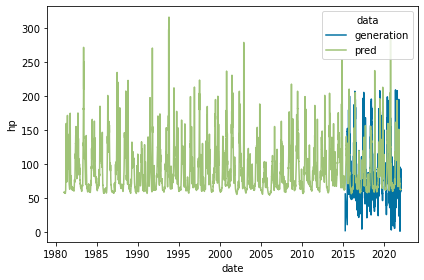

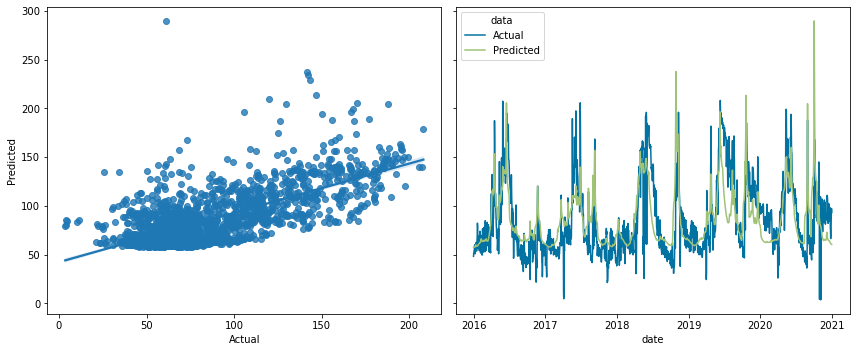

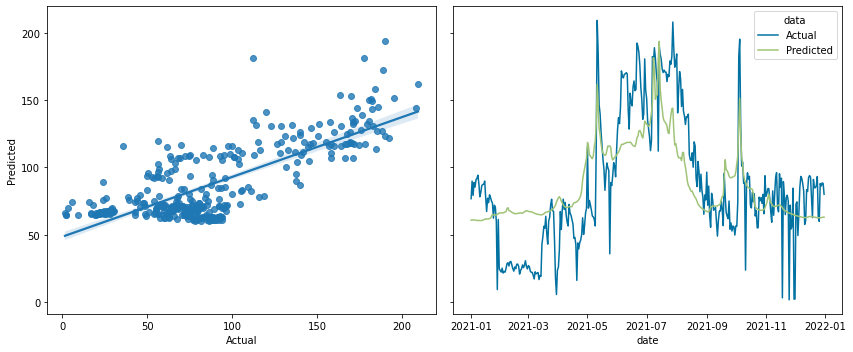

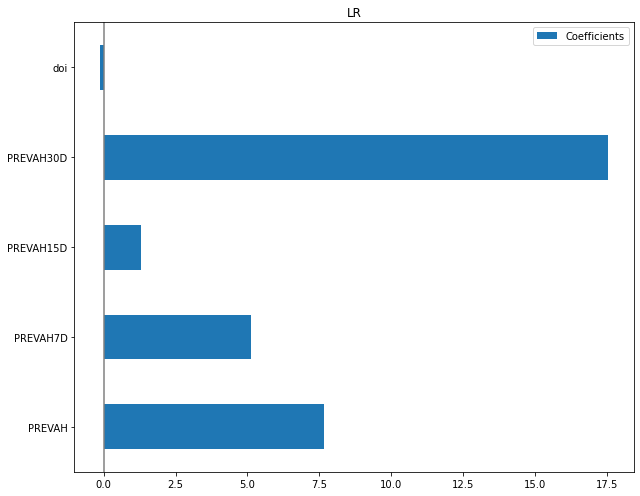

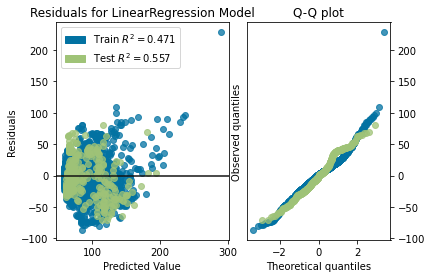

randomforest


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_RF.py:260: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(-mean_score), params)
/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


nan {'n_estimators': 5, 'max_features': 'sqrt', 'max_depth': 14}
nan {'n_estimators': 10, 'max_features': 'sqrt', 'max_depth': 10}
nan {'n_estimators': 3, 'max_features': 'auto', 'max_depth': 14}
nan {'n_estimators': 5, 'max_features': 'auto', 'max_depth': 12}
nan {'n_estimators': 3, 'max_features': 'auto', 'max_depth': 10}
nan {'n_estimators': 5, 'max_features': 'auto', 'max_depth': 10}
nan {'n_estimators': 8, 'max_features': 'sqrt', 'max_depth': 14}
nan {'n_estimators': 5, 'max_features': 'auto', 'max_depth': 14}
nan {'n_estimators': 3, 'max_features': 'sqrt', 'max_depth': 10}
nan {'n_estimators': 3, 'max_features': 'auto', 'max_depth': 8}
Score train: 0.9198
Score test: 0.9304
 RMSE: 10.811821
 RMSE: 12.472886
Saving figure AET Leventina_randomforest_reconstruction
Saving figure AET Leventina_randomforesttest
Saving figure AET Leventina_randomforesttrain
Saving figure AET Leventina_randomforestFeature_IMPORT
plotting residuals for AET Leventina
model randomforest


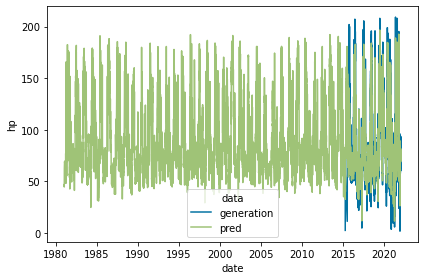

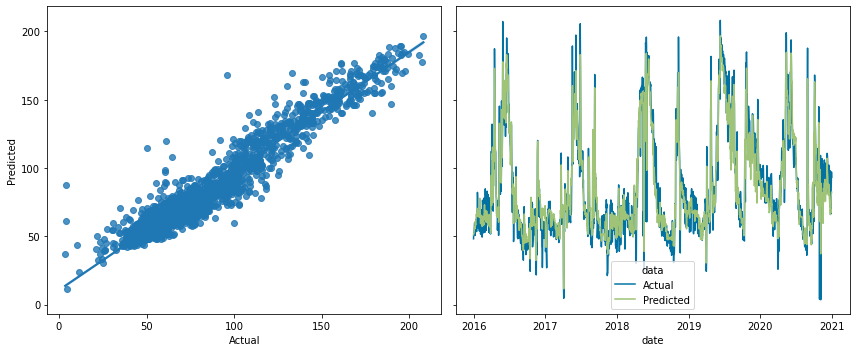

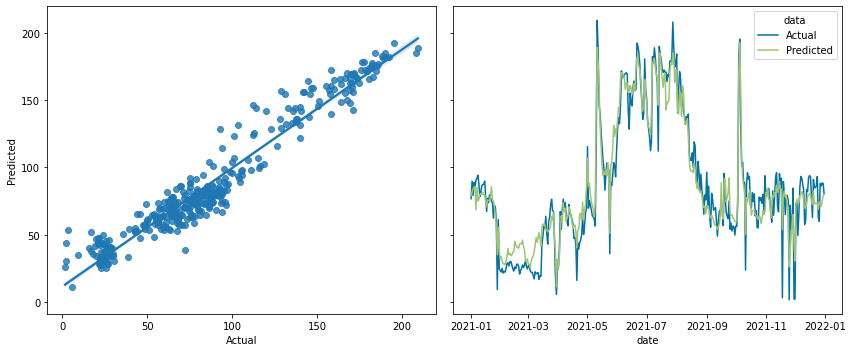

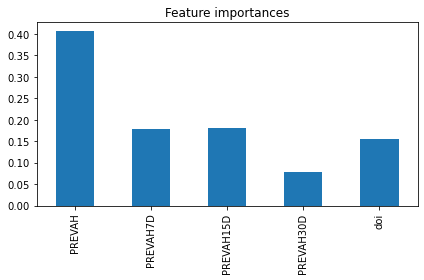

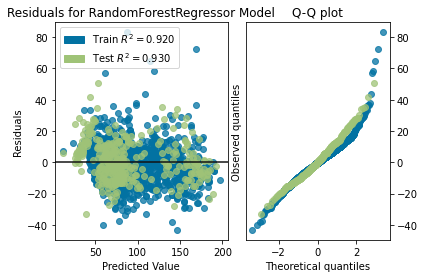

rf_Predefinesplit
Tuned RF params: <bound method BaseEstimator.set_params of RandomForestRegressor(max_depth=10, max_features=2, n_estimators=5)>
Tuned RF Score:  0.9043252010679904
Tuned RF Score:  0.9168699949988677
 RMSE: 11.807762
 RMSE: 13.630023


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure AET Leventina_rf_Predefinesplit_reconstruction
Saving figure AET Leventina_rf_Predefinesplittest
Saving figure AET Leventina_rf_Predefinesplittrain
Saving figure AET Leventina_rf_PredefinesplitFeature_IMPORT
plotting residuals for AET Leventina
model rf_Predefinesplit


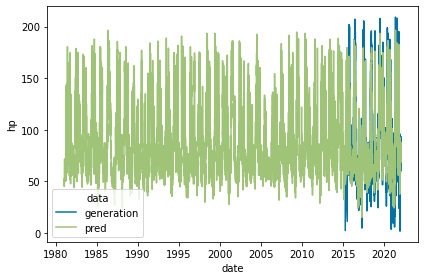

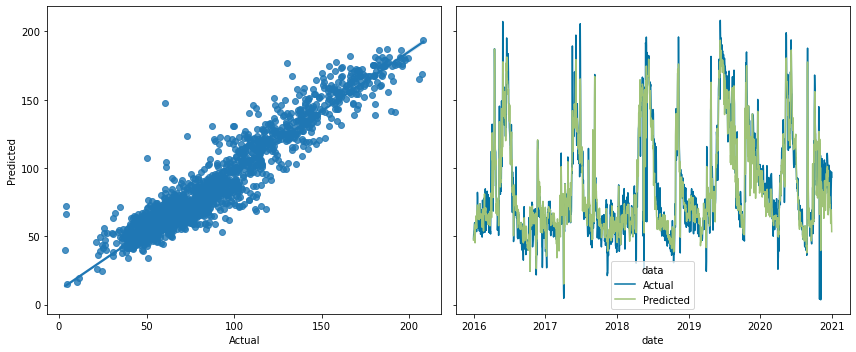

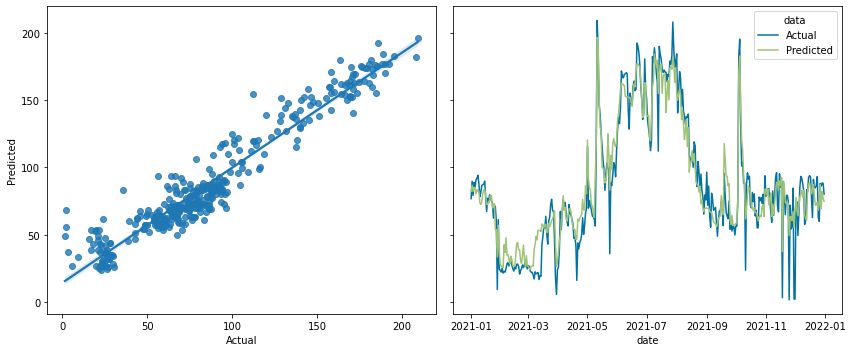

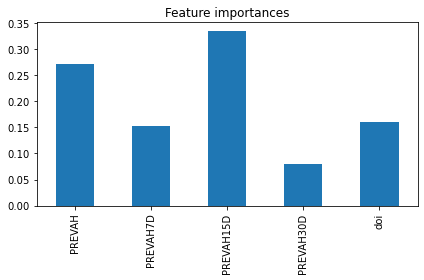

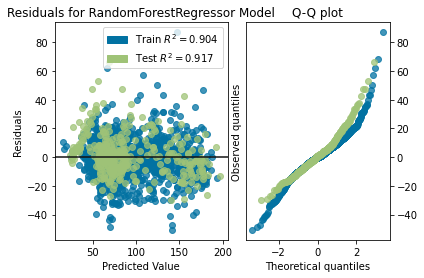

preparing data for 1
linear
Model r-sq mean: 0.8262938642043111
 RMSE: 45.679255
 RMSE: 41.348246


/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Electra-Massa (EM)_linear_reconstruction
Saving figure Electra-Massa (EM)_lineartest
Saving figure Electra-Massa (EM)_lineartrain
Saving figure Electra-Massa (EM)_linearFeature_IMPORT
plotting residuals for Electra-Massa (EM)
model linear


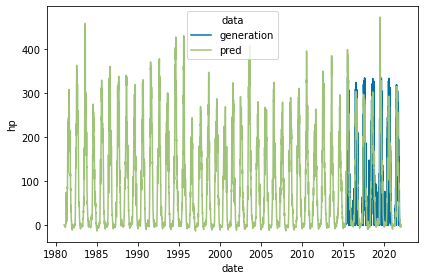

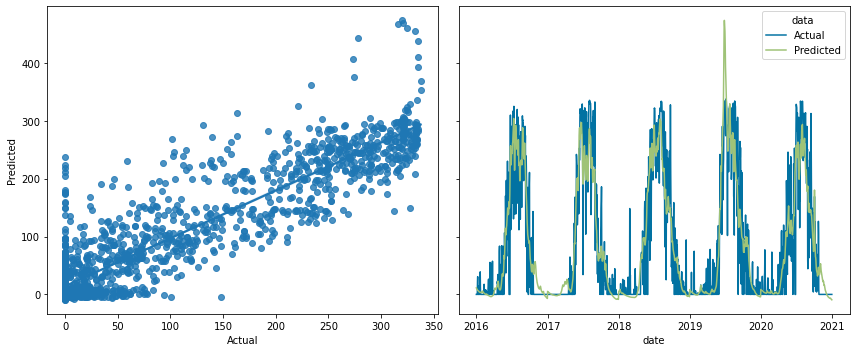

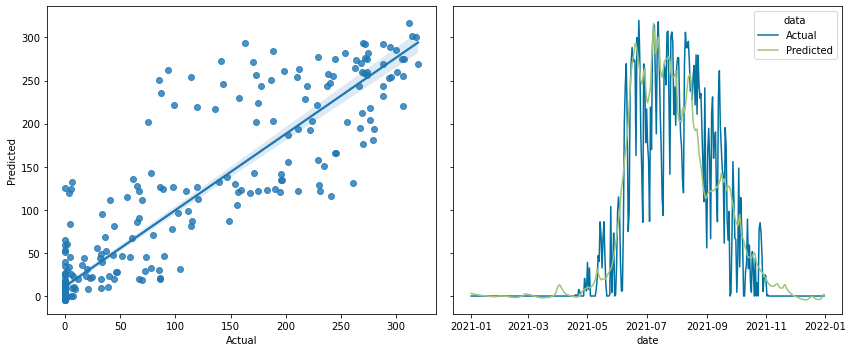

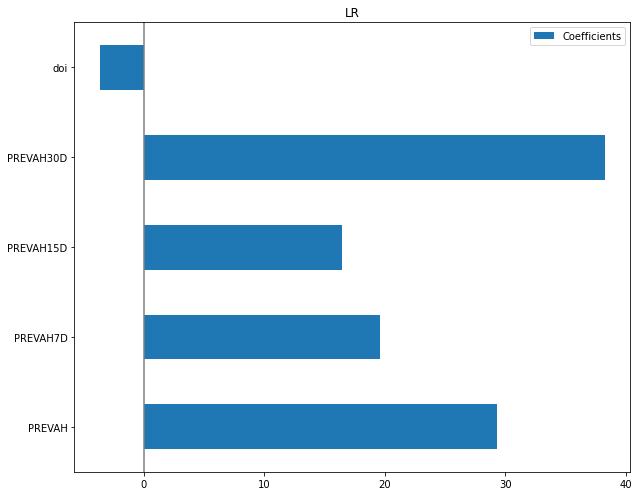

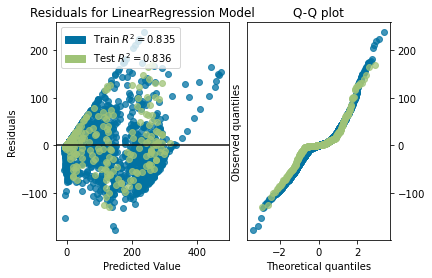

randomforest
nan {'n_estimators': 8, 'max_features': 'auto', 'max_depth': 10}
nan {'n_estimators': 10, 'max_features': 'sqrt', 'max_depth': 8}
nan {'n_estimators': 3, 'max_features': 'auto', 'max_depth': 8}
nan {'n_estimators': 10, 'max_features': 'sqrt', 'max_depth': 12}
nan {'n_estimators': 5, 'max_features': 'sqrt', 'max_depth': 8}
nan {'n_estimators': 5, 'max_features': 'sqrt', 'max_depth': 12}
nan {'n_estimators': 3, 'max_features': 'auto', 'max_depth': 12}
nan {'n_estimators': 3, 'max_features': 'sqrt', 'max_depth': 10}
nan {'n_estimators': 5, 'max_features': 'auto', 'max_depth': 14}
nan {'n_estimators': 3, 'max_features': 'sqrt', 'max_depth': 14}
Score train: 0.9364
Score test: 0.9287
 RMSE: 28.341729
 RMSE: 27.240201


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_RF.py:260: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(-mean_score), params)
/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Electra-Massa (EM)_randomforest_reconstruction
Saving figure Electra-Massa (EM)_randomforesttest
Saving figure Electra-Massa (EM)_randomforesttrain
Saving figure Electra-Massa (EM)_randomforestFeature_IMPORT
plotting residuals for Electra-Massa (EM)
model randomforest


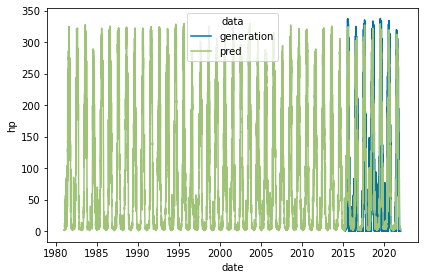

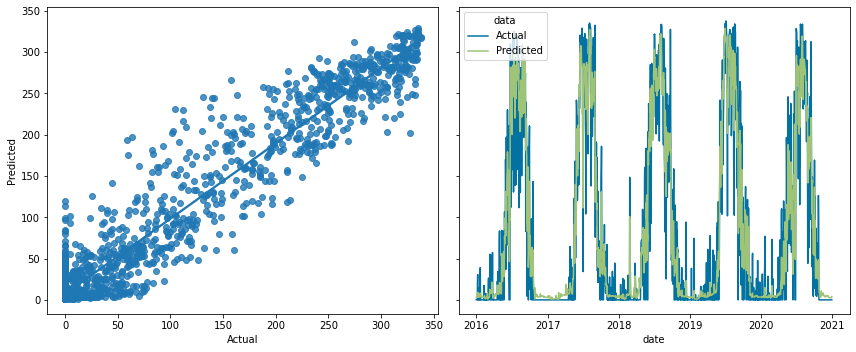

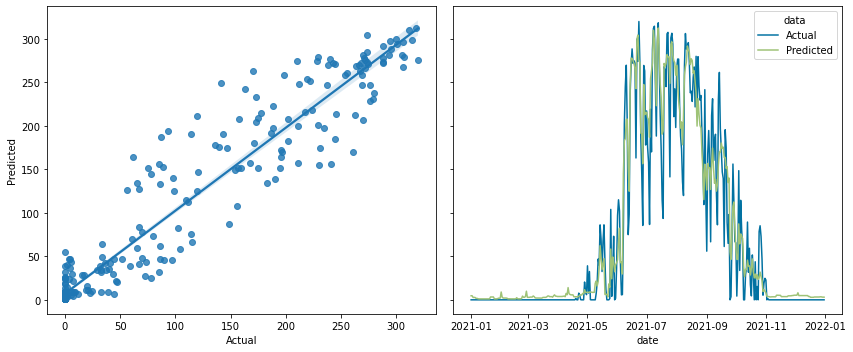

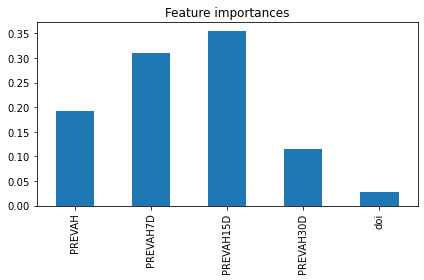

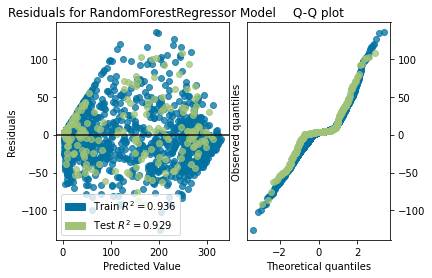

rf_Predefinesplit
Tuned RF params: <bound method BaseEstimator.set_params of RandomForestRegressor(max_depth=10, max_features=1, n_estimators=3)>
Tuned RF Score:  0.933762916254827
Tuned RF Score:  0.9189825604265096
 RMSE: 28.912051
 RMSE: 29.037073


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Electra-Massa (EM)_rf_Predefinesplit_reconstruction
Saving figure Electra-Massa (EM)_rf_Predefinesplittest
Saving figure Electra-Massa (EM)_rf_Predefinesplittrain
Saving figure Electra-Massa (EM)_rf_PredefinesplitFeature_IMPORT
plotting residuals for Electra-Massa (EM)
model rf_Predefinesplit


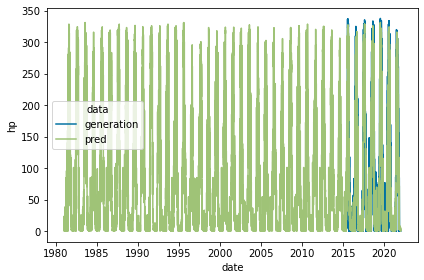

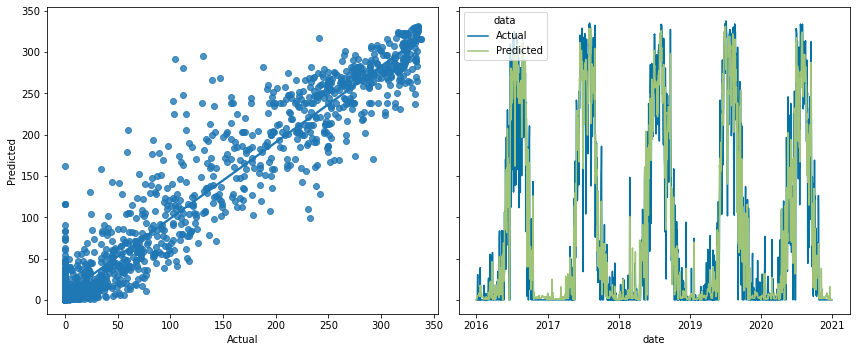

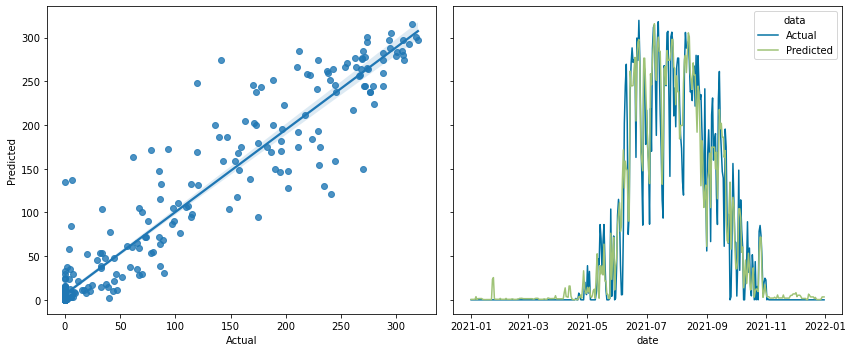

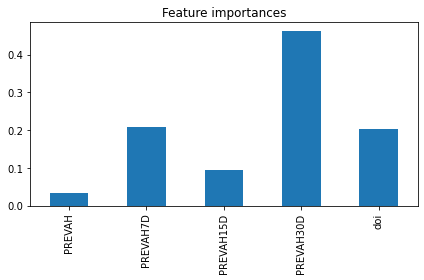

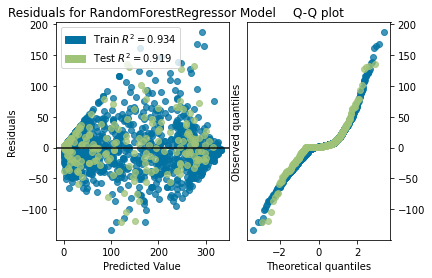

preparing data for 2
selecting different reconstruction dates
linear
Model r-sq mean: -0.05636427126633699
 RMSE: 46.031747
 RMSE: 42.303832


/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Emosson (ESA)_linear_reconstruction
Saving figure Emosson (ESA)_lineartest
Saving figure Emosson (ESA)_lineartrain
Saving figure Emosson (ESA)_linearFeature_IMPORT
plotting residuals for Emosson (ESA)
model linear


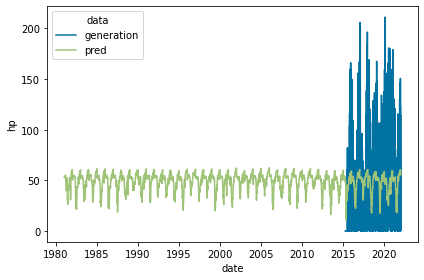

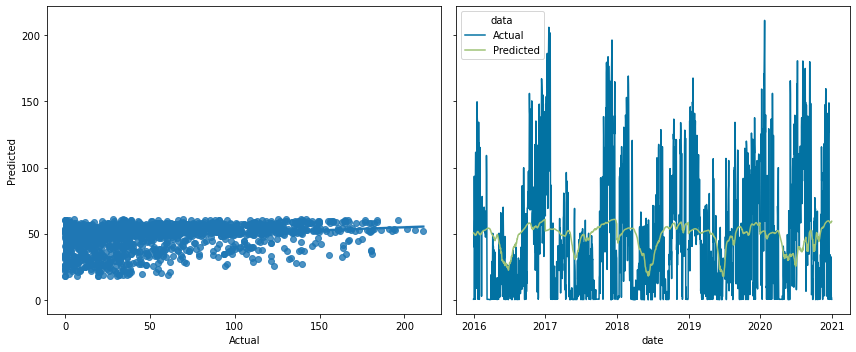

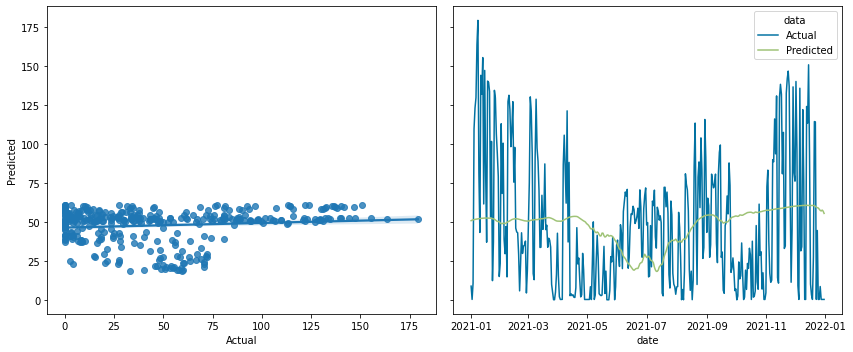

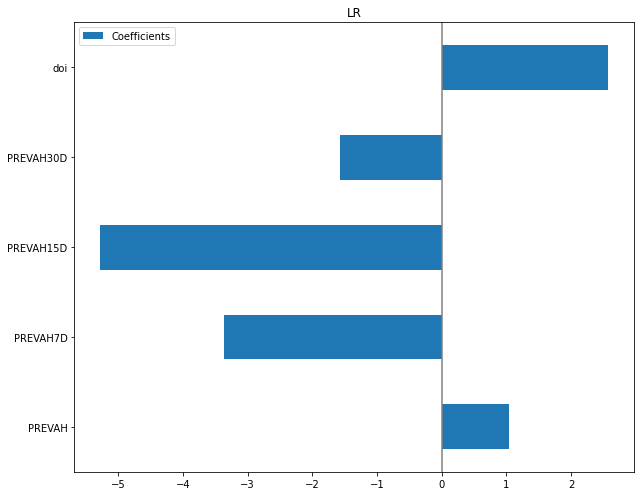

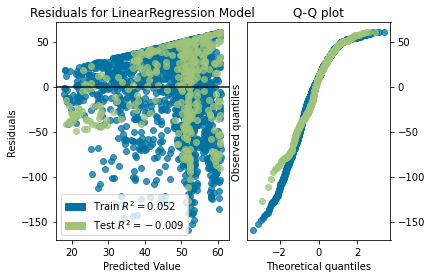

randomforest
0.1988198403800361 {'n_estimators': 8, 'max_features': 'auto', 'max_depth': 8}
0.3274958324952169 {'n_estimators': 3, 'max_features': 'auto', 'max_depth': 8}
0.4042796976205461 {'n_estimators': 5, 'max_features': 'auto', 'max_depth': 14}
0.27264717593192866 {'n_estimators': 10, 'max_features': 'sqrt', 'max_depth': 14}
0.41661392439243844 {'n_estimators': 3, 'max_features': 'sqrt', 'max_depth': 10}
0.30083032249332614 {'n_estimators': 8, 'max_features': 'auto', 'max_depth': 12}
0.2768695598079214 {'n_estimators': 8, 'max_features': 'auto', 'max_depth': 10}
0.37842243609547543 {'n_estimators': 3, 'max_features': 'sqrt', 'max_depth': 12}
0.22910029125498454 {'n_estimators': 3, 'max_features': 'sqrt', 'max_depth': 8}
0.13079431858396762 {'n_estimators': 10, 'max_features': 'sqrt', 'max_depth': 10}
Score train: 0.7086
Score test: 0.6476
 RMSE: 25.523254
 RMSE: 25.006640


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Emosson (ESA)_randomforest_reconstruction
Saving figure Emosson (ESA)_randomforesttest
Saving figure Emosson (ESA)_randomforesttrain
Saving figure Emosson (ESA)_randomforestFeature_IMPORT
plotting residuals for Emosson (ESA)
model randomforest


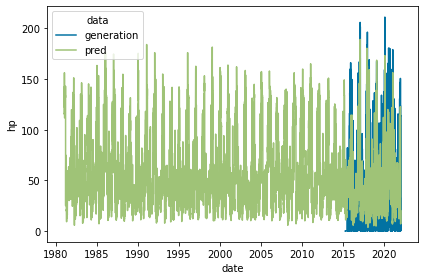

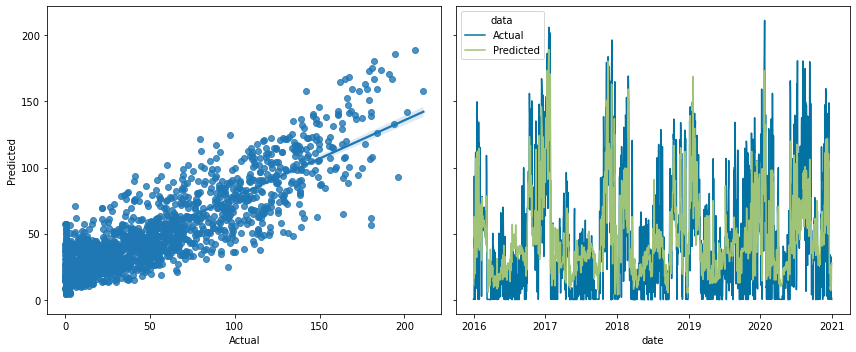

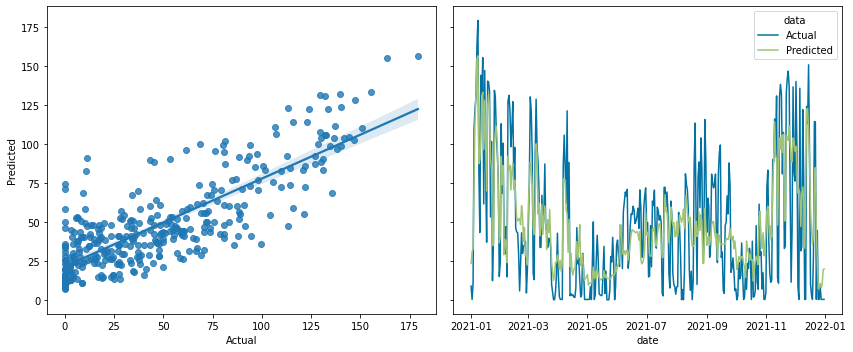

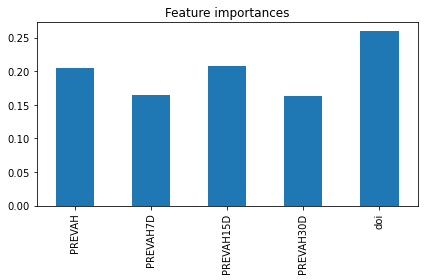

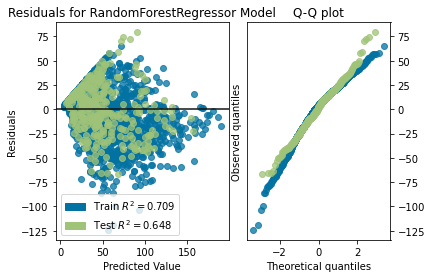

rf_Predefinesplit
Tuned RF params: <bound method BaseEstimator.set_params of RandomForestRegressor(max_depth=10, max_features=2, n_estimators=5)>
Tuned RF Score:  0.7033650776633775
Tuned RF Score:  0.6548909918990637
 RMSE: 25.750038
 RMSE: 24.746782


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Emosson (ESA)_rf_Predefinesplit_reconstruction
Saving figure Emosson (ESA)_rf_Predefinesplittest
Saving figure Emosson (ESA)_rf_Predefinesplittrain
Saving figure Emosson (ESA)_rf_PredefinesplitFeature_IMPORT
plotting residuals for Emosson (ESA)
model rf_Predefinesplit


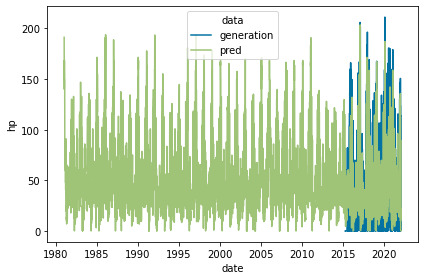

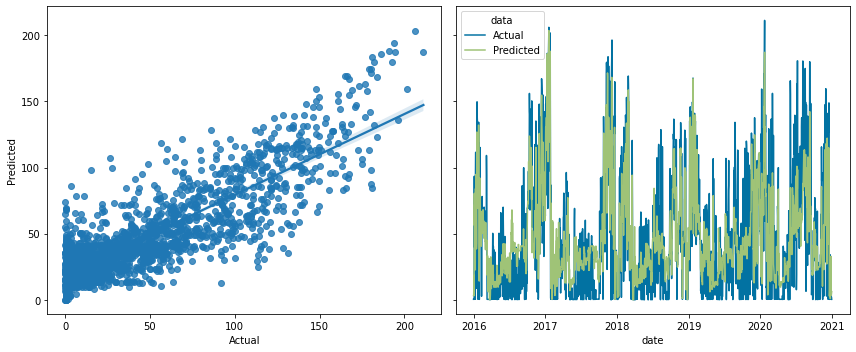

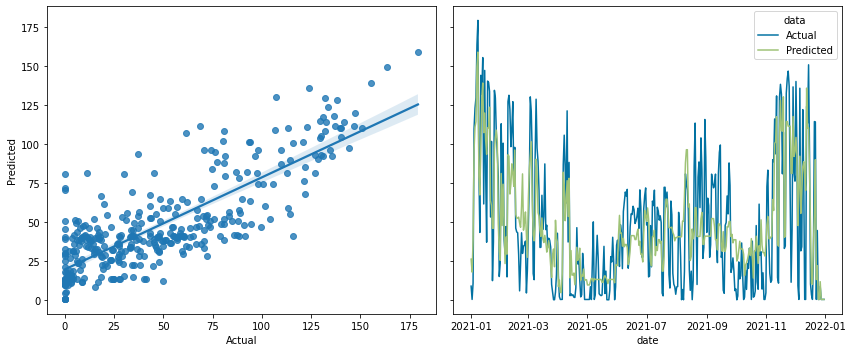

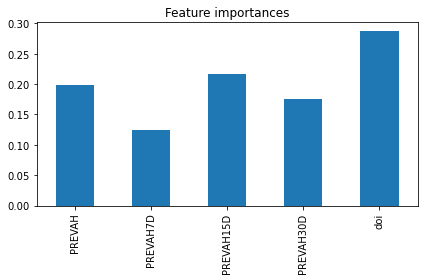

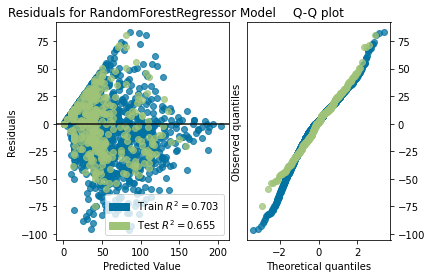

preparing data for 3
linear
Model r-sq mean: -0.18544859581878176
 RMSE: 11.144525
 RMSE: 14.076656


/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure KW Rheinfelden CH_linear_reconstruction
Saving figure KW Rheinfelden CH_lineartest
Saving figure KW Rheinfelden CH_lineartrain
Saving figure KW Rheinfelden CH_linearFeature_IMPORT
plotting residuals for KW Rheinfelden CH
model linear


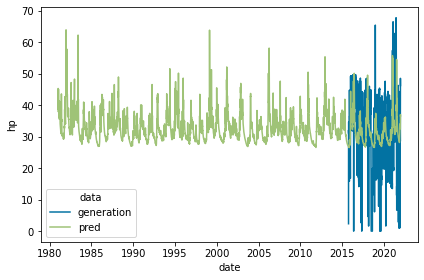

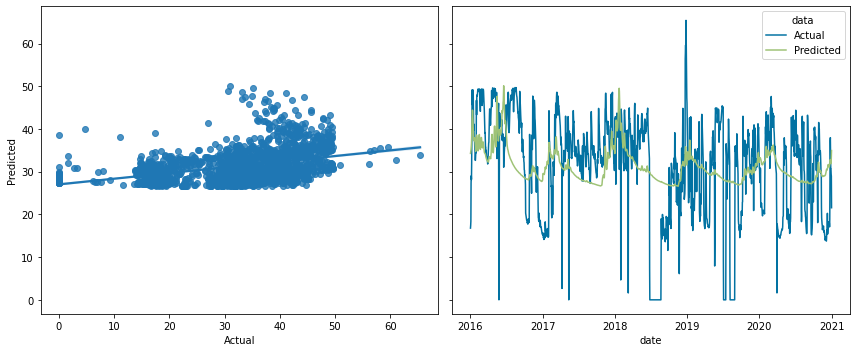

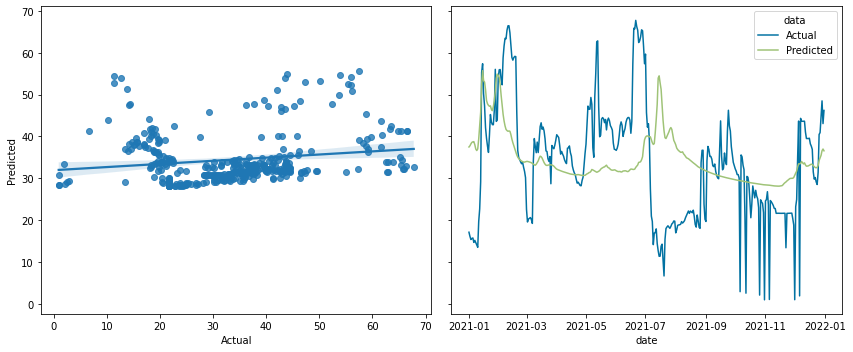

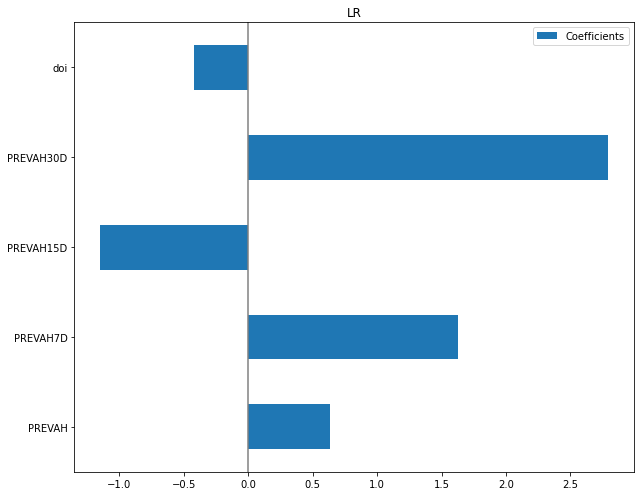

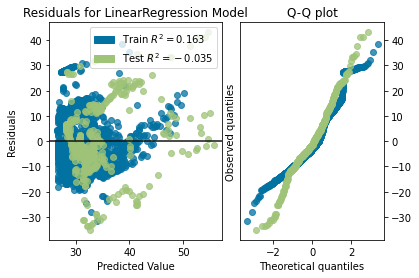

randomforest
0.6934624980848436 {'n_estimators': 10, 'max_features': 'sqrt', 'max_depth': 10}
0.737123121887657 {'n_estimators': 5, 'max_features': 'sqrt', 'max_depth': 14}
0.7600562844698013 {'n_estimators': 5, 'max_features': 'sqrt', 'max_depth': 8}
0.6314293000966996 {'n_estimators': 5, 'max_features': 'auto', 'max_depth': 8}
0.6730179795509554 {'n_estimators': 5, 'max_features': 'auto', 'max_depth': 12}
0.6701008673049833 {'n_estimators': 8, 'max_features': 'sqrt', 'max_depth': 14}
0.7772427938296044 {'n_estimators': 5, 'max_features': 'sqrt', 'max_depth': 10}
0.5811058886397379 {'n_estimators': 10, 'max_features': 'auto', 'max_depth': 8}
0.6508982314412215 {'n_estimators': 5, 'max_features': 'auto', 'max_depth': 14}
0.6728495524158781 {'n_estimators': 8, 'max_features': 'sqrt', 'max_depth': 12}
Score train: 0.7858
Score test: 0.8246
 RMSE: 5.638171
 RMSE: 5.795318


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure KW Rheinfelden CH_randomforest_reconstruction
Saving figure KW Rheinfelden CH_randomforesttest
Saving figure KW Rheinfelden CH_randomforesttrain
Saving figure KW Rheinfelden CH_randomforestFeature_IMPORT
plotting residuals for KW Rheinfelden CH
model randomforest


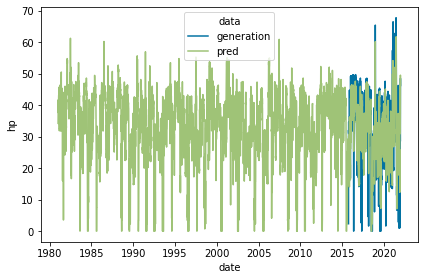

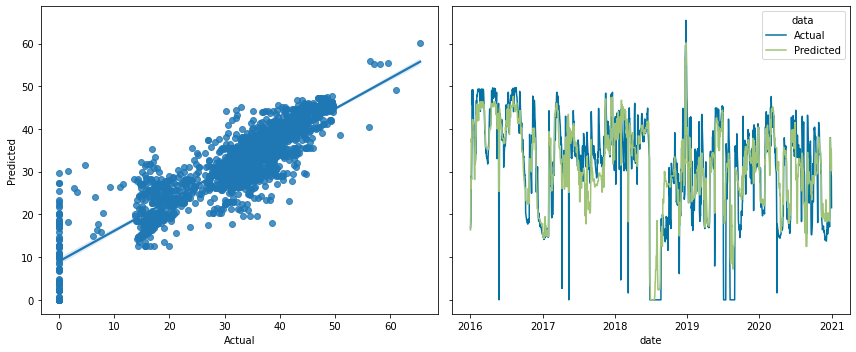

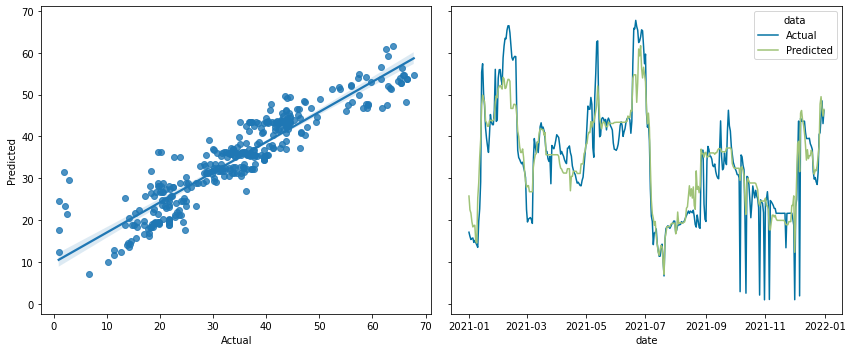

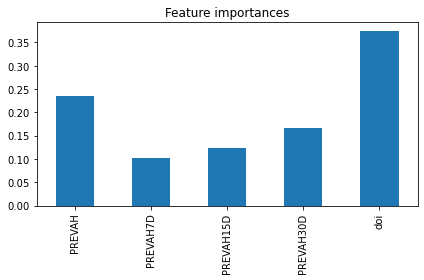

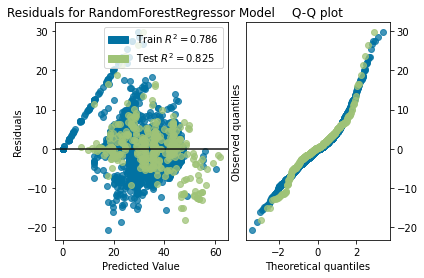

rf_Predefinesplit
Tuned RF params: <bound method BaseEstimator.set_params of RandomForestRegressor(max_depth=10, max_features=1, n_estimators=5)>
Tuned RF Score:  0.761881789868829
Tuned RF Score:  0.8299876004151332
 RMSE: 5.944500
 RMSE: 5.705449


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure KW Rheinfelden CH_rf_Predefinesplit_reconstruction
Saving figure KW Rheinfelden CH_rf_Predefinesplittest
Saving figure KW Rheinfelden CH_rf_Predefinesplittrain
Saving figure KW Rheinfelden CH_rf_PredefinesplitFeature_IMPORT
plotting residuals for KW Rheinfelden CH
model rf_Predefinesplit


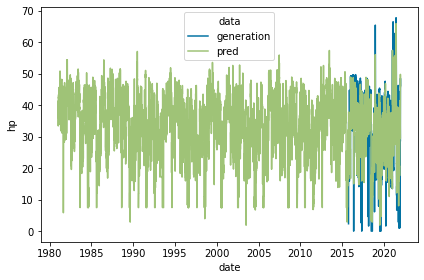

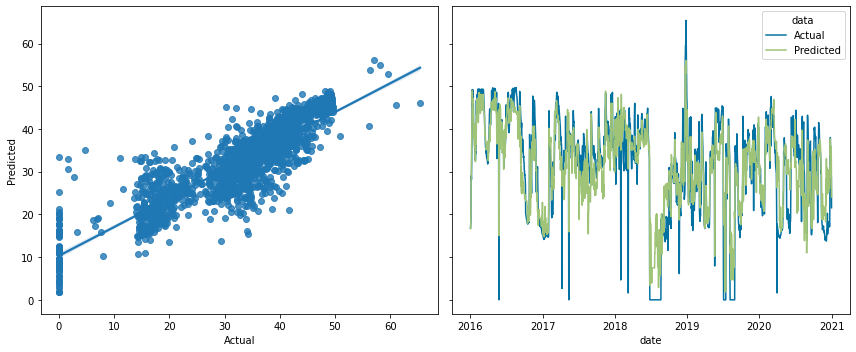

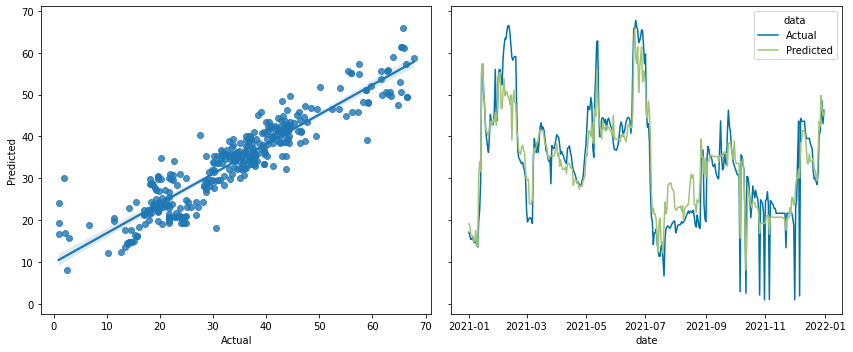

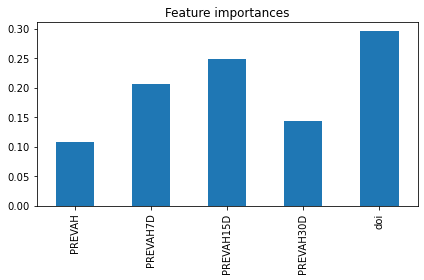

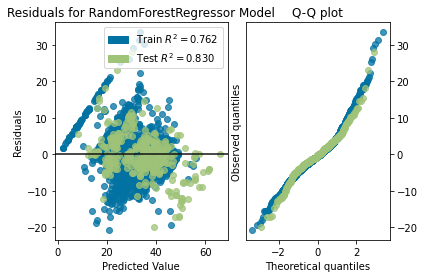

preparing data for 4
linear
Model r-sq mean: -0.08103444227841627
 RMSE: 88.865634
 RMSE: 79.604032


/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Kraftwerke Mauvoisin AG_linear_reconstruction
Saving figure Kraftwerke Mauvoisin AG_lineartest
Saving figure Kraftwerke Mauvoisin AG_lineartrain
Saving figure Kraftwerke Mauvoisin AG_linearFeature_IMPORT
plotting residuals for Kraftwerke Mauvoisin AG
model linear


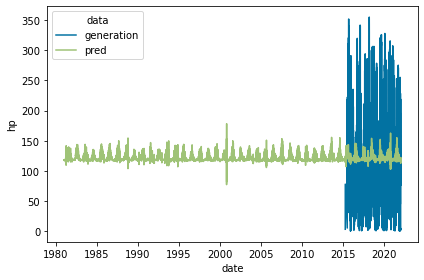

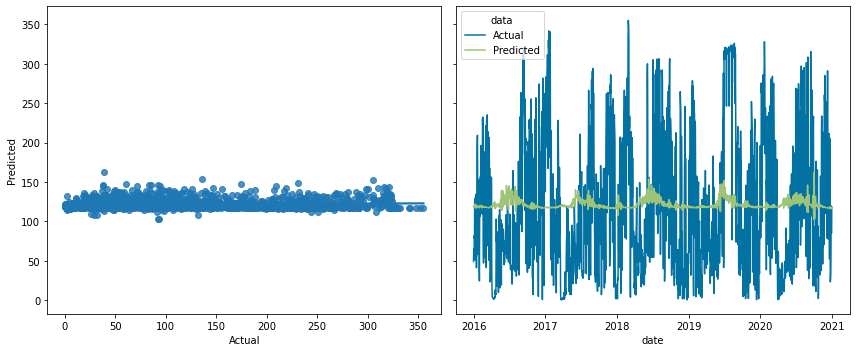

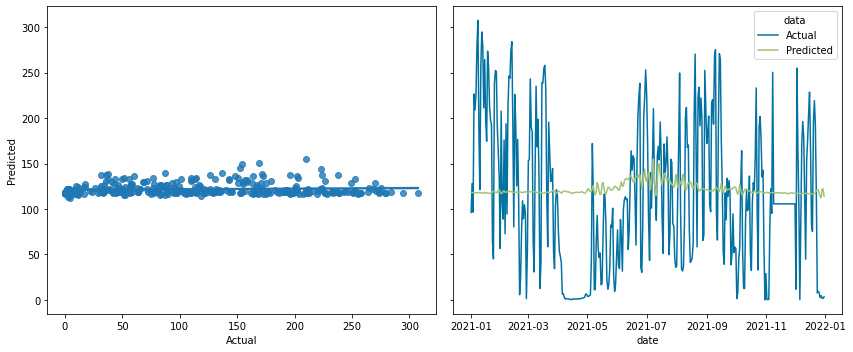

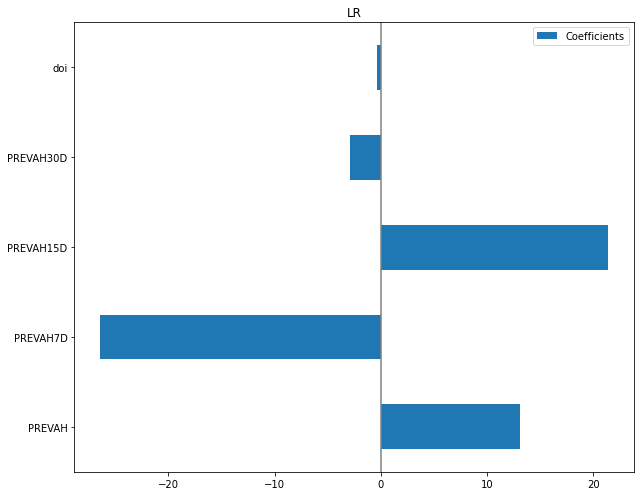

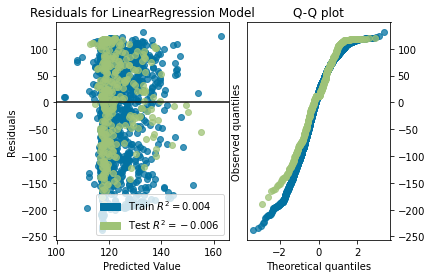

randomforest


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_RF.py:260: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(-mean_score), params)
/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


nan {'n_estimators': 5, 'max_features': 'auto', 'max_depth': 8}
0.10417346283742288 {'n_estimators': 8, 'max_features': 'sqrt', 'max_depth': 12}
0.19085549651336714 {'n_estimators': 5, 'max_features': 'sqrt', 'max_depth': 8}
nan {'n_estimators': 10, 'max_features': 'sqrt', 'max_depth': 10}
0.24612045650489733 {'n_estimators': 3, 'max_features': 'sqrt', 'max_depth': 10}
nan {'n_estimators': 5, 'max_features': 'sqrt', 'max_depth': 14}
0.13814129766604233 {'n_estimators': 8, 'max_features': 'auto', 'max_depth': 12}
nan {'n_estimators': 10, 'max_features': 'auto', 'max_depth': 8}
nan {'n_estimators': 10, 'max_features': 'auto', 'max_depth': 12}
0.3324124152234983 {'n_estimators': 3, 'max_features': 'auto', 'max_depth': 12}
Score train: 0.6379
Score test: 0.5058
 RMSE: 53.582158
 RMSE: 55.797788
Saving figure Kraftwerke Mauvoisin AG_randomforest_reconstruction
Saving figure Kraftwerke Mauvoisin AG_randomforesttest
Saving figure Kraftwerke Mauvoisin AG_randomforesttrain
Saving figure Kraftwe

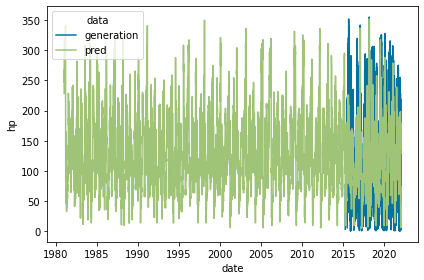

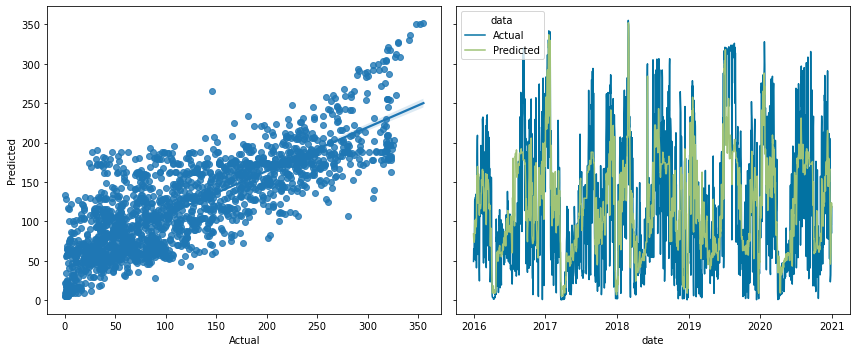

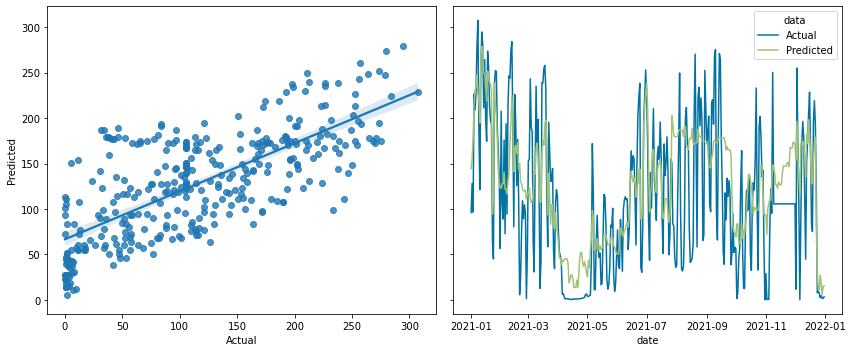

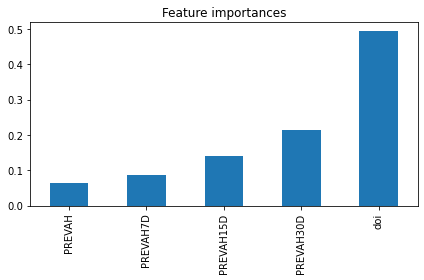

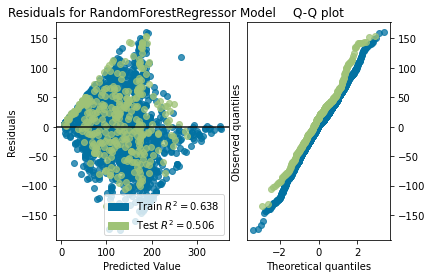

rf_Predefinesplit
Tuned RF params: <bound method BaseEstimator.set_params of RandomForestRegressor(max_depth=12, max_features=2, n_estimators=5)>
Tuned RF Score:  0.7841254812407905
Tuned RF Score:  0.7217561131094374
 RMSE: 41.373499
 RMSE: 41.867816


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Kraftwerke Mauvoisin AG_rf_Predefinesplit_reconstruction
Saving figure Kraftwerke Mauvoisin AG_rf_Predefinesplittest
Saving figure Kraftwerke Mauvoisin AG_rf_Predefinesplittrain
Saving figure Kraftwerke Mauvoisin AG_rf_PredefinesplitFeature_IMPORT
plotting residuals for Kraftwerke Mauvoisin AG
model rf_Predefinesplit


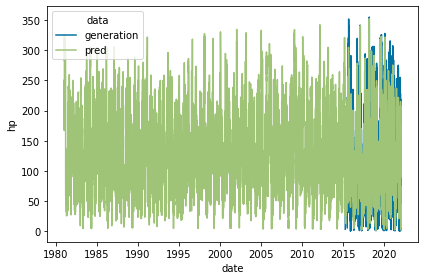

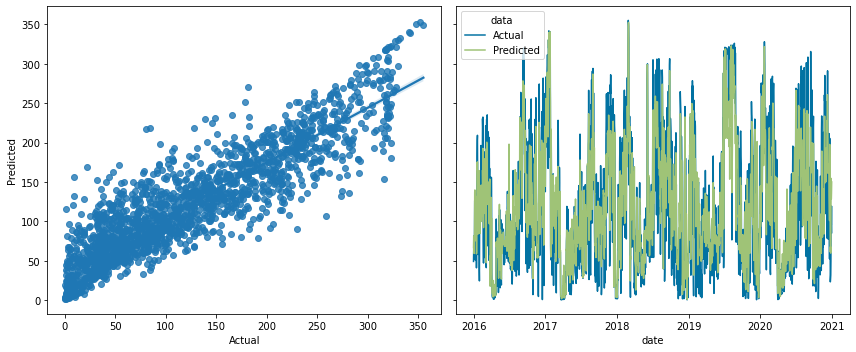

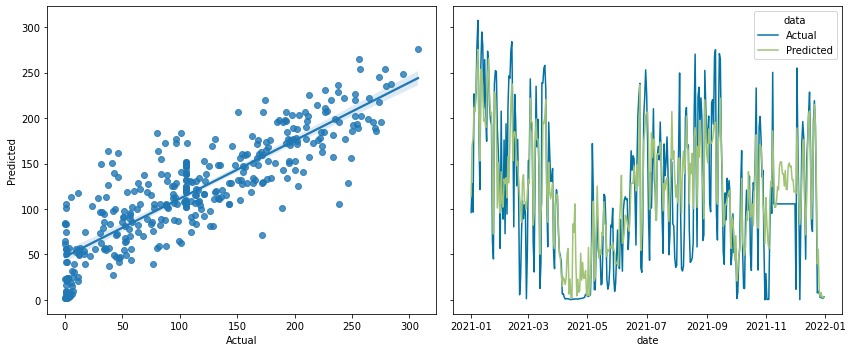

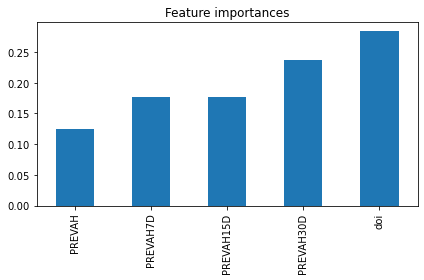

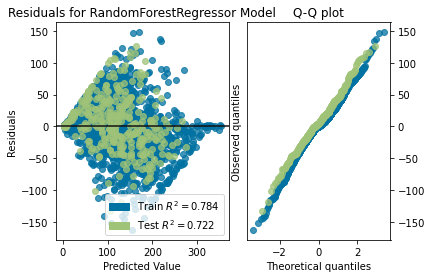

preparing data for 5
selecting different reconstruction dates
linear
Model r-sq mean: 0.0645580003186625
 RMSE: 45.424326
 RMSE: 49.135561


/Users/noeliaotero/opt/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Blenio (OFIBLE)_linear_reconstruction
Saving figure Blenio (OFIBLE)_lineartest
Saving figure Blenio (OFIBLE)_lineartrain
Saving figure Blenio (OFIBLE)_linearFeature_IMPORT
plotting residuals for Blenio (OFIBLE)
model linear


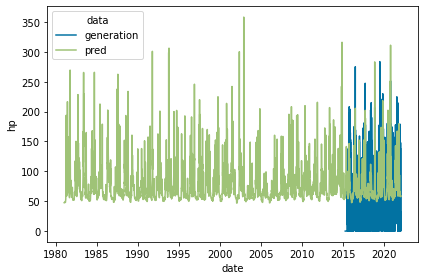

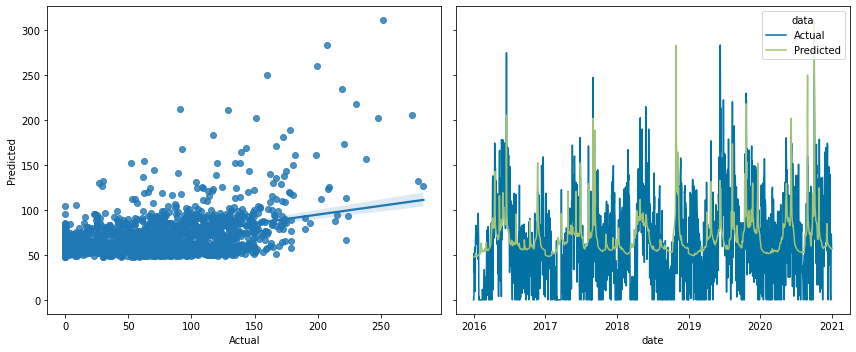

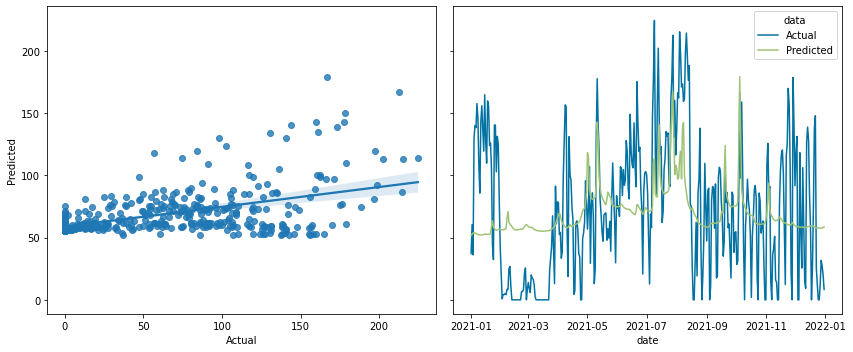

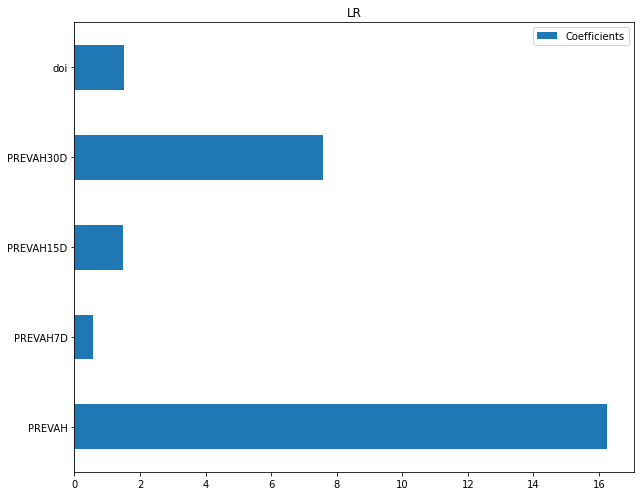

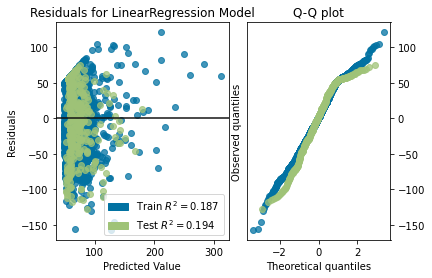

randomforest


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_RF.py:260: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(-mean_score), params)
/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


nan {'n_estimators': 10, 'max_features': 'sqrt', 'max_depth': 12}
0.08286204591659058 {'n_estimators': 5, 'max_features': 'sqrt', 'max_depth': 14}
0.08671772185333174 {'n_estimators': 5, 'max_features': 'sqrt', 'max_depth': 10}
nan {'n_estimators': 10, 'max_features': 'sqrt', 'max_depth': 8}
nan {'n_estimators': 3, 'max_features': 'sqrt', 'max_depth': 8}
nan {'n_estimators': 10, 'max_features': 'sqrt', 'max_depth': 10}
0.0411995384496676 {'n_estimators': 5, 'max_features': 'auto', 'max_depth': 14}
nan {'n_estimators': 8, 'max_features': 'sqrt', 'max_depth': 12}
nan {'n_estimators': 5, 'max_features': 'auto', 'max_depth': 12}
nan {'n_estimators': 8, 'max_features': 'auto', 'max_depth': 8}
Score train: 0.5425
Score test: 0.5979
 RMSE: 34.068307
 RMSE: 34.713366
Saving figure Blenio (OFIBLE)_randomforest_reconstruction
Saving figure Blenio (OFIBLE)_randomforesttest
Saving figure Blenio (OFIBLE)_randomforesttrain
Saving figure Blenio (OFIBLE)_randomforestFeature_IMPORT
plotting residuals f

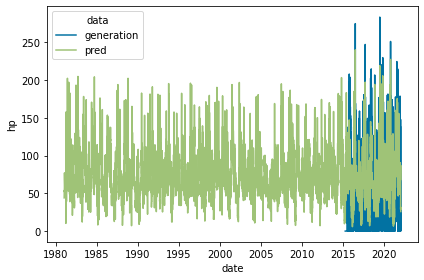

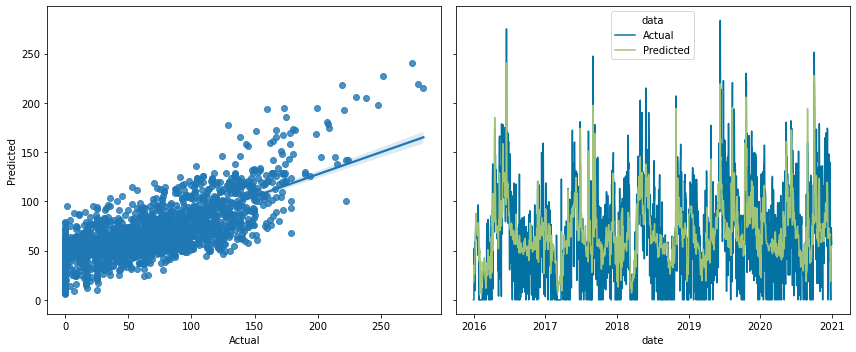

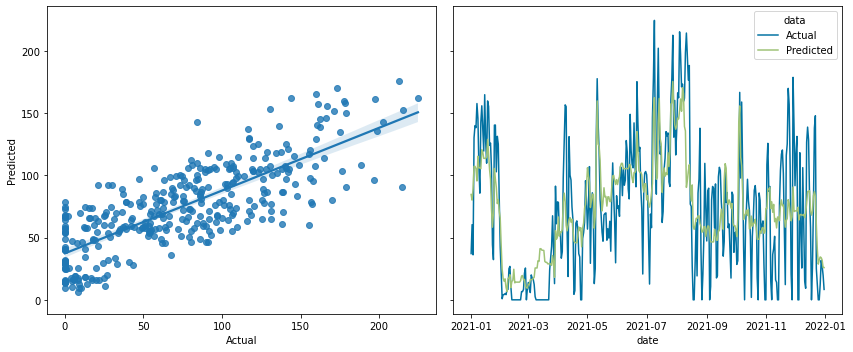

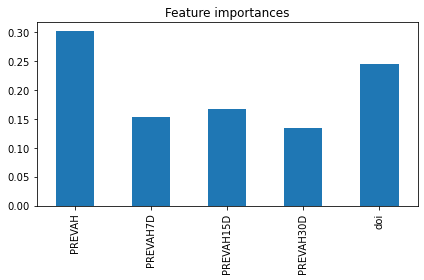

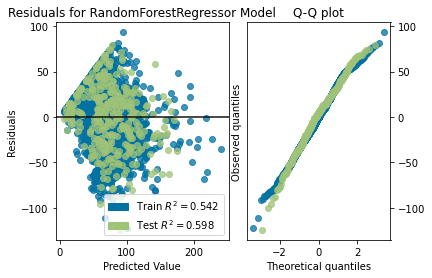

rf_Predefinesplit
Tuned RF params: <bound method BaseEstimator.set_params of RandomForestRegressor(max_depth=10, max_features=3, n_estimators=5)>
Tuned RF Score:  0.6628687802385074
Tuned RF Score:  0.6982067136236088
 RMSE: 29.244252
 RMSE: 30.075056


/Users/noeliaotero/Documents/OCCR/scripts/jupyter.notes/Hydropower/utils_functions/utils_plot.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = pred_recons.flatten()


Saving figure Blenio (OFIBLE)_rf_Predefinesplit_reconstruction
Saving figure Blenio (OFIBLE)_rf_Predefinesplittest
Saving figure Blenio (OFIBLE)_rf_Predefinesplittrain
Saving figure Blenio (OFIBLE)_rf_PredefinesplitFeature_IMPORT
plotting residuals for Blenio (OFIBLE)
model rf_Predefinesplit


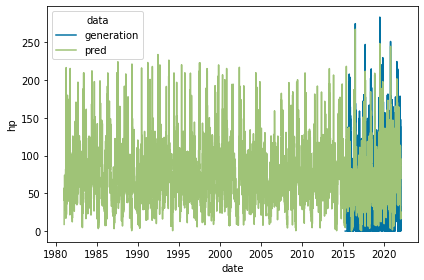

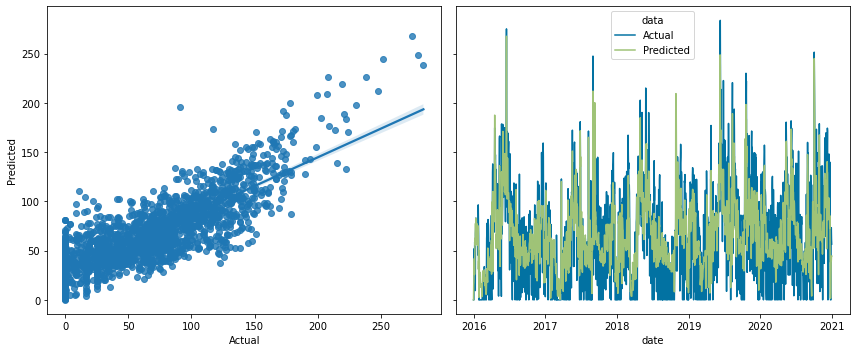

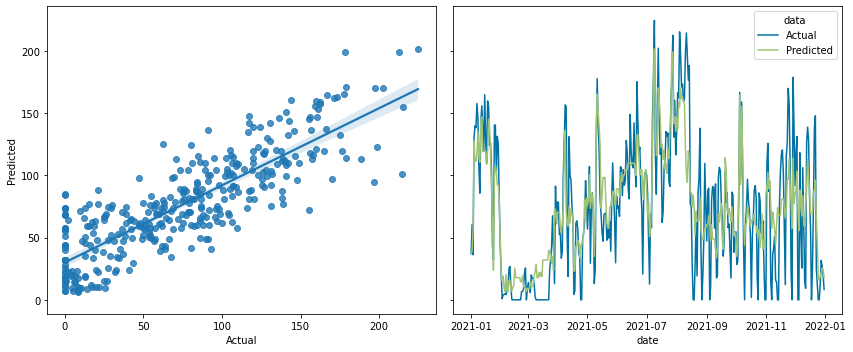

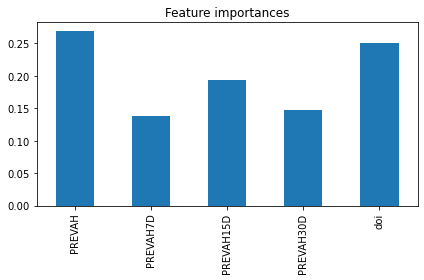

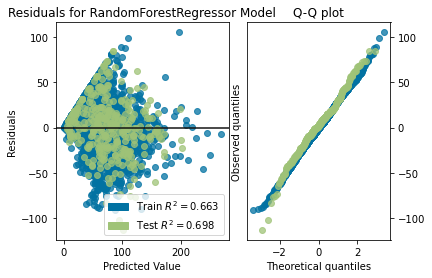

In [12]:
for station in range(0,len(list_input)):
#for station in range(4,5):
    
    print('preparing data for', station)
    df = list_input[station]
    df["date"] = pd.to_datetime(df["date"])
    # add day of the year
    df['doi'] = df.date.dt.dayofyear
    
    # to store the results
    name_s = df.name_p.unique()

    name_s = [x for x in name_s if x is not nan]
    name_s = ''.join(name_s)
    
    if name_s == 'Emosson (ESA)':
        # this is only when working with observations
        print('selecting different reconstruction dates')
        df_i = df[(df.date.dt.year >= YY_Emos_RECONSTRUCTION[0]) &  (df.date.dt.year <= YY_TEST[1])]
        dat_train, dat_test, dat_reconstruction, dates_train, dates_test, dates_recons = splitdata(df,YY_TRAIN, YY_TEST, YY_Emos_RECONSTRUCTION)
    elif name_s == 'Blenio (OFIBLE)':
        print('selecting different reconstruction dates')
        df_i = df[(df.date.dt.year >= YY_OFIBLE_RECONSTRUCTION[0]) &  (df.date.dt.year <= YY_TEST[1])]
        dat_train, dat_test, dat_reconstruction, dates_train, dates_test, dates_recons = splitdata(df,YY_TRAIN, YY_TEST, YY_OFIBLE_RECONSTRUCTION)
    else:  
        df_i = df[(df.date.dt.year >= YY_RECONSTRUCTION[0]) &  (df.date.dt.year <= YY_TEST[1])]
        dat_train, dat_test, dat_reconstruction, dates_train, dates_test, dates_recons = splitdata(df,YY_TRAIN, YY_TEST, YY_RECONSTRUCTION)
   
    X_train_in, y_train, X_test_in, y_test, X_reconstruction_in, X_all_in, fpipeline = preparedata_tomodel(dat_train, dat_test, dat_reconstruction, df_i, colnames, label)
    # For TimesplitSeries
    yy_tot = np.append(dates_train.dt.year, dates_test.dt.year)
    yy = np.unique(yy_tot, return_counts=False)
    # save fpipeline
    l_fpipeline.append(fpipeline)
    
    l_recons = []
    l_pw_model =[]
    for imod in range(0,len(models)):
        print(models[imod])
        
        if models[imod] == 'linear':
            r=Classicalmodels(models[imod],X_train_in, y_train, X_test_in, y_test, yy, Features, None, csv = True)
        elif models[imod] == 'randomforest':
            r=Classicalmodels(models[imod],X_train_in, y_train, X_test_in, y_test, yy, Features, methods[0], csv = False)
        elif models[imod] == 'rf_Predefinesplit':
            r=Classicalmodels(models[imod],X_train_in, y_train, X_test_in, y_test, yy, Features, None, csv = False)
            
        pred_test = r.model.predict(X_test_in)
        pred_train = r.model.predict(X_train_in)
        rmse_train = evaluate_model(y_train, pred_train)
        rmse_test = evaluate_model(y_test, pred_test)
        mae_train = mean_absolute_error(y_train, pred_train)
        mae_test = mean_absolute_error(y_test, pred_test)
         # add scores
        train_score = r.model.score(X_train_in, y_train)
        test_score = r.model.score(X_test_in, y_test)
        
        
        fig_recons = name_s + '_' + models[imod] + '_reconstruction'
        dat_recons = recons(r.model, X_all_in, df_i)
        
         
        # plot reconstructions
        plot_recons(dat_recons,fig_recons, IMAGES_PATH)
        
        dat_recons.columns = ['date','generation','pred_'+ models[imod]]
        

        df_out = df_out.append({'station': name_s}, ignore_index=True)
        df_out.at[df_out.index[-1],'model'] = models[imod]
        df_out.at[df_out.index[-1], 'train_rmse'] = rmse_train
        df_out.at[df_out.index[-1], 'test_rmse'] = rmse_test
        df_out.at[df_out.index[-1], 'train_mae'] = mae_train
        df_out.at[df_out.index[-1], 'test_mae'] = mae_test
        df_out.at[df_out.index[-1], 'train_score'] = train_score
        df_out.at[df_out.index[-1], 'test_score'] = test_score
       

        # add also the correlations between predicted and observed
        cor_train = stats.pearsonr(pred_train, y_train)[0]
        cor_test = stats.pearsonr(pred_test, y_test)[0]
        df_out.at[df_out.index[-1], 'cor_train'] = cor_train
        df_out.at[df_out.index[-1], 'cor_test'] = cor_test
        
        
        l_recons.append(dat_recons)
        df_recons = pd.concat(l_recons,axis=1)
        df_recons = df_recons.loc[:,~df_recons.columns.duplicated()]
        # remove generation data as I will merge later
        df_recons = df_recons.drop('generation',axis=1)
        # Create the visualizer, fit, score, and show it
         
        l_pw_model.append(r)
        
        if plot:
            
            fig_train = name_s + '_' + models[imod] + 'test' 
            plot_moutput(dates_train, y_train, pred_train, fig_train, IMAGES_PATH)
            fig_test = name_s + '_' + models[imod] + 'train' 
            plot_moutput(dates_test, y_test, pred_test, fig_test, IMAGES_PATH)
            
          # importance
            fig_importance = name_s + '_' + models[imod] + 'Feature_IMPORT'
            show_features(r.model, models[imod], Features, fig_importance, IMAGES_PATH)
            
            print('plotting residuals for',name_s)
            print('model',models[imod])
            plt.figure()
            viz = residuals_plot(r.model, X_train_in, y_train, X_test_in, y_test,hist=False, qqplot=True)

            
    new_df = pd.merge(df_i, df_recons,  on=['date']) 
        
    all_data.append(new_df)
    l_mod.append(l_pw_model)
        

In [13]:
# save results
PATH_OUT = '/Users/noeliaotero/Documents/OCCR/Results/Hydro_project/Analysis_Updates_June/ClassicalModels_onlydischarge_doi/'

In [14]:
names_list = df_out.station.unique()

In [15]:
df_out.to_csv(PATH_OUT + 'ClassicalM_table_perf_PREVAH_withdoi.csv')

In [16]:
df_out

station              model train_rmse  test_rmse  \
0             AET Leventina             linear  27.773884  31.449945   
1             AET Leventina       randomforest  10.811821  12.472886   
2             AET Leventina  rf_Predefinesplit  11.807762  13.630023   
3        Electra-Massa (EM)             linear  45.679255  41.348246   
4        Electra-Massa (EM)       randomforest  28.341729  27.240201   
5        Electra-Massa (EM)  rf_Predefinesplit  28.912051  29.037073   
6             Emosson (ESA)             linear  46.031747  42.303832   
7             Emosson (ESA)       randomforest  25.523254   25.00664   
8             Emosson (ESA)  rf_Predefinesplit  25.750038  24.746782   
9         KW Rheinfelden CH             linear  11.144525  14.076656   
10        KW Rheinfelden CH       randomforest   5.638171   5.795318   
11        KW Rheinfelden CH  rf_Predefinesplit     5.9445   5.705449   
12  Kraftwerke Mauvoisin AG             linear  88.865634  79.604032   
13  Kraftwerke Mauvoisin AG       randomforest  53.582158  55.797788   
14  Kraftwerke Mauvoisin AG  rf_Predefinesplit  41.373499  41.867816   
15          Blenio (OFIBLE)             linear  45.424326  49.135561   
16          Blenio (OFIBLE)       randomforest  34.068307  34.713366   
17          Blenio (OFIBLE)  rf_Predefinesplit  29.244252  30.075056   

    train_mae   test_mae train_score test_score cor_train  cor_test  
0   20.777995   25.97154    0.470659   0.557407  0.687652  0.771882  
1     7.94756    9.87705    0.919784   0.930386  0.960585  0.966432  
2    8.482732    10.0438    0.904325    0.91687  0.951554  0.960809  
3   29.798871  24.325855    0.834659   0.835719  0.913648  0.915973  
4   18.533433  16.436938     0.93635   0.928699  0.967993  0.964666  
5   17.368843  15.895791    0.933763   0.918983  0.966417  0.959132  
6    37.12282  36.510075    0.052059  -0.008505  0.230166  0.113928  
7   20.005742  20.149865    0.708567   0.647605  0.864087  0.814263  
8   19.481483  19.996071    0.703365   0.654891  0.848741  0.814191  
9    8.943597  10.784432    0.163078  -0.034904  0.415247  0.175594  
10   3.963904   3.934668    0.785791    0.82459  0.890916  0.918197  
11   4.249476   4.064575    0.761882   0.829988  0.880648  0.924641  
12  75.460864  66.831549     0.00408  -0.005854  0.066684  0.075686  
13  41.819752  44.264093    0.637926   0.505804    0.8081  0.730495  
14   30.57907  32.161752    0.784125   0.721756  0.893532  0.862012  
15  37.842664   41.21639    0.186617   0.194457  0.432568  0.456032  
16  27.798967  27.633643    0.542471   0.597941  0.753176  0.787363  
17  23.079714  22.863748    0.662869   0.698207  0.822139  0.843821

In [18]:
PATH_data_out

'/Users/noeliaotero/Documents/OCCR/data/Output_data/csv/outmodels_onlydischarge_doi/simulations_PREVAH/Classical_withdoi/'

In [19]:
for item in range(0,len(all_data)):
    print(names_list[item])
    all_data[item].to_csv(PATH_data_out  + names_list[item] +'.csv', header=True, index=False)

AET Leventina
Electra-Massa (EM)
Emosson (ESA)
KW Rheinfelden CH
Kraftwerke Mauvoisin AG
Blenio (OFIBLE)


In [20]:
PATH_model_save = PATH_data_out + 'models/'
os.makedirs(PATH_model_save, exist_ok=True)

In [21]:
# save the models
import _pickle as cPickle
for item in range(0,len(l_mod)):
    #print(names_list[item])
    for imod in range(0,len(models)):
        #print(models[imod])
        f_out = PATH_model_save + names_list[item] + '_' + models[imod]+ '.pkl'
        # save the models
        with open(f_out, 'wb') as fid:
            cPickle.dump(l_mod[item][imod], fid)   
        

In [22]:
PATH_pip_save = PATH_data_out + 'pipelines/'
os.makedirs(PATH_pip_save, exist_ok=True)

In [23]:
import joblib
for item in range(0,len(l_mod)):
    print(names_list[item])
    joblib.dump(l_fpipeline[item], PATH_pip_save +'/' +names_list[item]+ '.pkl')

AET Leventina
Electra-Massa (EM)
Emosson (ESA)
KW Rheinfelden CH
Kraftwerke Mauvoisin AG
Blenio (OFIBLE)
